# Лаборторная работа №4

Линейные модели, SVM и деревья решений.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.tree import plot_tree

In [3]:
data = load_iris()

In [4]:
X = data.data
y = data.target

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Начнем обучение с логистической регрессии

In [5]:
# Обучение логистической регрессии
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_scaled, y_train)

# Предсказание на тестовых данных
y_pred_logistic_regression = logistic_regression.predict(X_test_scaled)

# Оценка качества модели
accuracy_lr = accuracy_score(y_test, y_pred_logistic_regression)
precision_lr = precision_score(y_test, y_pred_logistic_regression, average='weighted')
recall_lr = recall_score(y_test, y_pred_logistic_regression, average='weighted')
f1_lr = f1_score(y_test, y_pred_logistic_regression, average='weighted')

print("Логистическая регрессия:")
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1 Score:", f1_lr)
print("\nClassification Report:\n", classification_report(y_test, y_pred_logistic_regression))

Логистическая регрессия:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Теперь проделаем то же самое для метода опорных векторов (SVM):

In [6]:
# Обучение метода опорных векторов (SVM)
svm = SVC(kernel='linear')
svm.fit(X_train_scaled, y_train)

# Предсказание на тестовых данных
y_pred_svm = svm.predict(X_test_scaled)

# Оценка качества модели
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

print("Метод опорных векторов (SVM):")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

Метод опорных векторов (SVM):
Accuracy: 0.9666666666666667
Precision: 0.9694444444444444
Recall: 0.9666666666666667
F1 Score: 0.9664109121909632

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



Обучим модель дерева решений

In [7]:
# Обучение модели дерева решений
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_decision_tree = decision_tree.predict(X_test)

# Оценка качества модели
accuracy_dt = accuracy_score(y_test, y_pred_decision_tree)
precision_dt = precision_score(y_test, y_pred_decision_tree, average='weighted')
recall_dt = recall_score(y_test, y_pred_decision_tree, average='weighted')
f1_dt = f1_score(y_test, y_pred_decision_tree, average='weighted')

print("Дерево решений:")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1 Score:", f1_dt)
print("\nClassification Report:\n", classification_report(y_test, y_pred_decision_tree))

Дерево решений:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Построим график, показывающий важность признаков в дереве решений:

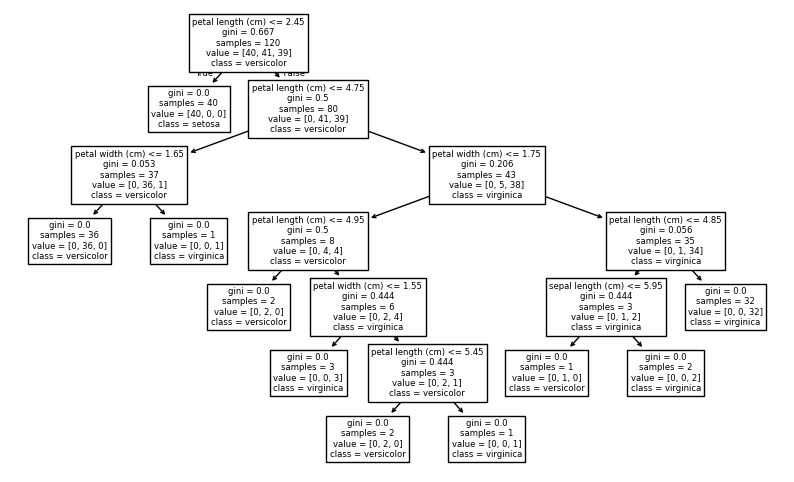

In [8]:
# Построение графика важности признаков в дереве решений
plt.figure(figsize=(10, 6))
plot_tree(decision_tree, feature_names=data.feature_names, class_names=data.target_names)
plt.show()